# Figure 1

Author: Sandra Godinho Silva \
Creation date: 23/09/2020 \
Version: 0.2 (1/01/2021)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


%matplotlib inline
#plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

## Imports

In [3]:
metrics = pd.read_csv("../../1_Dataset_creation/Dataset.csv")
metrics = metrics.rename(columns={"Genome_ID":"Assembly accession"})
metrics.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,High
1,GCA_000023285.1,GCA_000023285.1_ASM2328v1_genomic,p__Bacteroidetes (UID2605),100.00,0.00,0.0,100.00,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,Capnocytophaga ochracea,1,1,2612925,2612925,0.0,1,2612925,1,2612925,1,2612925,1,2612925,2612925,2612925,1,100.0,0.39588,0.0,High


In [4]:
metadata = pd.read_csv("../../2_Metadata/Metadata_final.csv")
metadata.head(2)

,Assembly accession,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NCBI,376686.0,NaN,Flavobacterium johnsoniae UW101,Flavobacterium johnsoniae UW101,NaN,NaN,Aerobic,identical,NaN,NaN,NaN,NaN,NaN,2014-01-28T00:00:00.000,NaN,NC_009441,representative genome,5017.0,NaN,assembly from type material,Major,NaN,Non-halophilic,SAMN02598357,CP000685,NaN,2007/05/01,DOE Joint Genome Institute,NaN,NaN,NaN,NaN,complete,NaN,986.0,NaN,No,ATCC 17061,NaN,NaN,Generic,Generic.1.0,US DOE Joint Genome Institute,NaN,NaN,376686.0,NaN,20-30,Mesophilic,NaN,NaN,type strain of Flavobacterium johnsoniae,Yes,NaN,latest,NaN,NaN,NaN,False,Non_marine
1,GCA_000023285.1,ASM2328v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,PRJNA29403,SAMN00001911,NaN,Generic sample from Capnocytophaga ochracea DS...,NaN,NaN,Rod,NaN,NaN,Capnocytophaga ochracea DSM 7271,2009-04-30T00:00:00Z,NaN,NaN,1.0,NaN,DSM 7271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics = statistics.rename(columns={"Unnamed: 0":"Assembly accession"})
statistics.head(2)

,Assembly accession,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036


In [6]:
statistics.describe()

,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000
mean,3199.770235,5272.502424,1231.480045,2000.995151,88.091011,39.462142,63.335659,2.656457
std,955.167195,1434.360160,291.250417,537.250808,51.359604,4.173492,4.446347,1.068066
min,552.000000,1103.000000,325.000000,454.000000,8.000000,14.633840,26.767994,0.590120
25%,2536.000000,4274.000000,1020.000000,1610.000000,53.000000,36.768150,60.596850,1.964840
50%,3172.000000,5351.000000,1257.000000,2012.000000,81.000000,39.174389,63.353500,2.432147
75%,3825.000000,6244.000000,1431.000000,2375.000000,108.000000,41.563636,65.752186,3.011259
max,7961.000000,8877.000000,1978.000000,3349.000000,316.000000,58.876812,82.246377,8.152511


## Merge

In [7]:
dataset = pd.merge(metrics, statistics, how="left", left_on="Assembly accession", right_on="Assembly accession", indicator="merge")
dataset["merge"].value_counts()

both          2681
right_only       0
left_only        0
Name: merge, dtype: int64

In [8]:
dataset = pd.merge(dataset, metadata, how="left", left_on="Assembly accession", right_on="Assembly accession", indicator="merge2")
dataset["merge2"].value_counts()

both          2680
left_only        1
right_only       0
Name: merge2, dtype: int64

In [9]:
dataset.drop(columns=["merge", "merge2"], inplace=True)
dataset.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,High,5192,8348,1843,3127,244,35.496918,60.227273,4.699538,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NCBI,376686.0,NaN,Flavobacterium johnsoniae UW101,Flavobacteri

## Dataset metrics

In [89]:
dataset['Genus'].nunique()

175

In [90]:
pd.to_datetime(dataset['Seq rel date']).dt.year.value_counts()


2017.0    664
2020.0    479
2018.0    448
2019.0    423
2016.0    285
2014.0    132
2015.0    101
2013.0     80
2012.0     31
2011.0     15
2010.0      7
2009.0      6
2007.0      4
2006.0      4
2008.0      1
Name: Seq rel date, dtype: int64

In [91]:
dataset[dataset["Family"]=="Flavobacteriaceae"]["Origin"].value_counts()

Marine          768
Unclassified    667
Non_marine      488
Name: Origin, dtype: int64

In [92]:
dataset["Origin"].value_counts()/len(dataset.index)*100

Unclassified    36.926520
Non_marine      33.494965
Marine          29.541216
Name: Origin, dtype: float64

In [93]:
dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>49)["Genus"].value_counts()

Flavobacterium      589
Chryseobacterium    294
Elizabethkingia     193
Capnocytophaga       75
Tenacibaculum        68
Riemerella           59
Polaribacter         57
Winogradskyella      55
Muricauda            53
Myroides             50
Name: Genus, dtype: int64

In [94]:
dataset_reduced = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"])["scaf_bp"].describe().round(1).reset_index()
dataset_reduced = dataset_reduced.sort_values(by=["Family","Genus"])
dataset_reduced.head()

,Genus,Family,count,mean,std,min,25%,50%,75%,max
0,Aequorivita,Flavobacteriaceae,42.0,3200449.9,337441.8,2300656.0,3081628.2,3193359.0,3327236.0,4042904.0
1,Algibacter,Flavobacteriaceae,9.0,4651915.2,193665.3,4167837.0,4638103.0,4705407.0,4707503.0,4816342.0
3,Aquimarina,Flavobacteriaceae,39.0,5446681.9,1075942.7,2093196.0,5125818.0,5838147.0,6131240.0,7041311.0
4,Arenibacter,Flavobacteriaceae,22.0,5102481.5,531078.2,3985366.0,4728098.0,5260762.0,5472734.0,5857781.0
5,BACL21,Flavobacteriaceae,15.0,2271538.9,676488.7,1214042.0,1772900.5,1915951.0,2881385.5,3240799.0


In [95]:
dataset_reduced2 = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family", "Origin"])["Origin"].count().to_frame()#
dataset_reduced2 = dataset_reduced2.rename(columns={"Origin":"Value"})#.reset_index()
dataset_reduced2.head()

Value
Genus       Family            Origin             
Aequorivita Flavobacteriaceae Marine           31
                              Non_marine        5
                              Unclassified      6
Algibacter  Flavobacteriaceae Marine            3
                              Non_marine        1

<Figure size 1440x216 with 0 Axes>

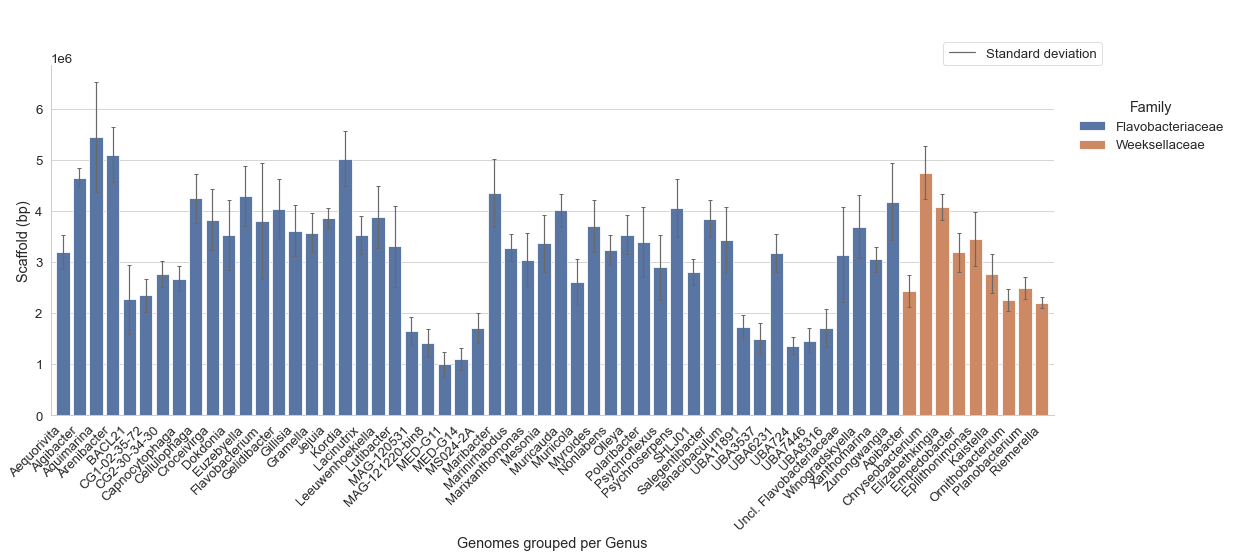

In [96]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

plt.figure(figsize=(20,3))

g = sns.catplot(
    data=dataset_reduced, kind="bar", 
    x='Genus', hue="Family",dodge=False, legend_out=True, 
    y='mean', 
    height=6, # make the plot 7 units high
    aspect=2.5) # height is n times width

g._legend.set_bbox_to_anchor((1, 1))

g.map(plt.errorbar, "Genus", "mean", "std", ls='none', capsize=2, color="dimgrey")

plt.xlabel('Genomes grouped per Genus') 
plt.ylabel('Scaffold (bp)')

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.margins(x=0.0055)
    
import matplotlib.lines as mlines
black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
                          markersize=7, label='Standard deviation')
plt.legend(handles=[black_line], bbox_to_anchor=(0.89, 1), loc=(0,2), borderaxespad=0.);

#plt.show()    
ax = plt.gca()
g.savefig("genome_size.svg")

In [97]:
dataset_reduced = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"])["scaf_bp"].describe().round(1).reset_index()
dataset_reduced.head()

,Genus,Family,count,mean,std,min,25%,50%,75%,max
0,Aequorivita,Flavobacteriaceae,42.0,3200449.9,337441.8,2300656.0,3081628.2,3193359.0,3327236.0,4042904.0
1,Algibacter,Flavobacteriaceae,9.0,4651915.2,193665.3,4167837.0,4638103.0,4705407.0,4707503.0,4816342.0
2,Apibacter,Weeksellaceae,21.0,2431255.1,312039.2,2255307.0,2275687.0,2326653.0,2331098.0,3296886.0
3,Aquimarina,Flavobacteriaceae,39.0,5446681.9,1075942.7,2093196.0,5125818.0,5838147.0,6131240.0,7041311.0
4,Arenibacter,Flavobacteriaceae,22.0,5102481.5,531078.2,3985366.0,4728098.0,5260762.0,5472734.0,5857781.0


In [98]:
dataset_reduced = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby([ "Family"])["scaf_bp"].describe().round(1).reset_index()
dataset_reduced.head()

,Family,count,mean,std,min,25%,50%,75%,max
0,Flavobacteriaceae,1650.0,3517174.3,1123448.5,569462.0,2797355.0,3405979.0,4150103.0,7041311.0
1,Weeksellaceae,710.0,3929983.8,982223.8,1748436.0,3150627.0,4093812.0,4707221.5,6187872.0


In [99]:
dataset_reduced = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"])["scaf_bp"].describe().round(1).reset_index()

dataset_reduced2 = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"])["scaf_bp"].describe().round(1).reset_index()
dataset_reduced2 = dataset_reduced2.sort_values(by=["Family","Genus"])
dataset_reduced4 = dataset_reduced2[["Genus","Family","mean"]]
dataset_reduced4 = dataset_reduced4.pivot(index='Genus', columns='Family', values='mean')
dataset_reduced4 = dataset_reduced4.fillna(0).reset_index()
merge = pd.merge(dataset_reduced4, dataset_reduced, how="left", left_on="Genus", right_on="Genus")
merge = merge[["Genus", "Flavobacteriaceae", "Weeksellaceae", "Family"]]
merge = merge.sort_values(by=["Family","Genus"])
merge = merge.drop(columns="Family")
merge.head()

,Genus,Flavobacteriaceae,Weeksellaceae
0,Aequorivita,3200449.9,0.0
1,Algibacter,4651915.2,0.0
3,Aquimarina,5446681.9,0.0
4,Arenibacter,5102481.5,0.0
5,BACL21,2271538.9,0.0


In [100]:
dataset_reduced5 = dataset_reduced2[["Genus","Family","std"]]
dataset_reduced5.head()

,Genus,Family,std
0,Aequorivita,Flavobacteriaceae,337441.8
1,Algibacter,Flavobacteriaceae,193665.3
3,Aquimarina,Flavobacteriaceae,1075942.7
4,Arenibacter,Flavobacteriaceae,531078.2
5,BACL21,Flavobacteriaceae,676488.7


In [101]:
merge2 = pd.merge(merge, dataset_reduced5[["Genus","std"]], how="left", left_on="Genus", right_on="Genus")
merge2.head()
merge2.to_csv("Genome_size.csv")

In [102]:
merge2["Total"] = merge2["Flavobacteriaceae"] + merge2["Weeksellaceae"]
merge2["Total2"] = "0, 0, 0"
merge2.head()


,Genus,Flavobacteriaceae,Weeksellaceae,std,Total,Total2
0,Aequorivita,3200449.9,0.0,337441.8,3200449.9,"0, 0, 0"
1,Algibacter,4651915.2,0.0,193665.3,4651915.2,"0, 0, 0"
2,Aquimarina,5446681.9,0.0,1075942.7,5446681.9,"0, 0, 0"
3,Arenibacter,5102481.5,0.0,531078.2,5102481.5,"0, 0, 0"
4,BACL21,2271538.9,0.0,676488.7,2271538.9,"0, 0, 0"


In [103]:
dataset_reduced = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"])["scaf_bp"].describe().round(1).reset_index()

count = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"])["scaf_bp"].count().reset_index()
count = count.rename(columns={"scaf_bp":"count"})#.reset_index()
count = count.sort_values(by=["Family","Genus"])

#count= count.drop(columns="Family")
count.head()

,Genus,Family,count
0,Aequorivita,Flavobacteriaceae,42
1,Algibacter,Flavobacteriaceae,9
3,Aquimarina,Flavobacteriaceae,39
4,Arenibacter,Flavobacteriaceae,22
5,BACL21,Flavobacteriaceae,15


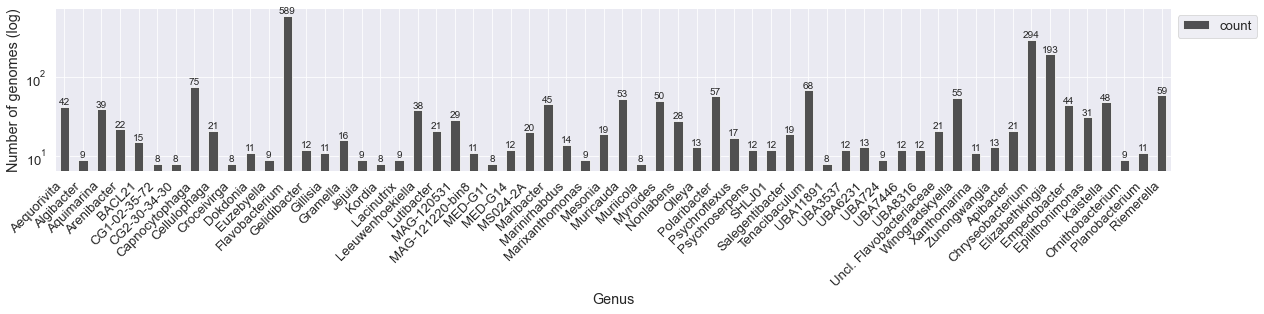

In [104]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=1.5) 

my_colors=["#505050","#505050"]

ax = count.plot(kind='bar', x="Genus" ,figsize=(20,3), stacked=True, legend=False, color=my_colors)#, yerr="std")#, error_kw=dict(ecolor='black',elinewidth=0.5, barsabove=True))
ax.set(yscale="log")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=10) # set the alignment of the text

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(ylabel='Number of genomes (log)')
    
fig = ax.get_figure()

fig.savefig("Genome_count_log.svg", dpi=300, bbox_inches='tight')

In [105]:
dataset_reduced2 = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family", "Origin"])["Origin"].count().to_frame()#
dataset_reduced2 = dataset_reduced2.rename(columns={"Origin":"Value"})#.reset_index()
dataset_reduced2 = dataset_reduced2.unstack('Origin')#.droplevel(level=0)
dataset_reduced2 = dataset_reduced2.fillna(0)

dataset_reduced2.columns = dataset_reduced2.columns.droplevel()

dataset_reduced2 = dataset_reduced2.reset_index()#.drop_index()
dataset_reduced2["Total"] = dataset_reduced2["Marine"] + dataset_reduced2["Non_marine"] + dataset_reduced2["Unclassified"]
dataset_reduced3 = dataset_reduced2.copy()
dataset_reduced3["Marine %"] = dataset_reduced3["Marine"] / dataset_reduced3["Total"] *100
dataset_reduced3["Non_marine %"] = dataset_reduced3["Non_marine"] / dataset_reduced3["Total"] *100
dataset_reduced3["Unclassified %"] = dataset_reduced3["Unclassified"] / dataset_reduced3["Total"] *100
dataset_reduced3 = dataset_reduced3.drop(columns=["Marine", "Non_marine","Unclassified","Total"])
dataset_reduced3 = dataset_reduced3.sort_values(by=["Family","Genus"])
dataset_reduced3 = dataset_reduced3.rename(columns={"Marine %":"Marine","Non_marine %":"Non_marine", "Unclassified %":"Unclassified"})#.reset_index()

dataset_reduced3.head() 


Origin,Genus,Family,Marine,Non_marine,Unclassified
0,Aequorivita,Flavobacteriaceae,73.809524,11.904762,14.285714
1,Algibacter,Flavobacteriaceae,33.333333,11.111111,55.555556
3,Aquimarina,Flavobacteriaceae,46.153846,7.692308,46.153846
4,Arenibacter,Flavobacteriaceae,59.090909,9.090909,31.818182
5,BACL21,Flavobacteriaceae,73.333333,20.000000,6.666667


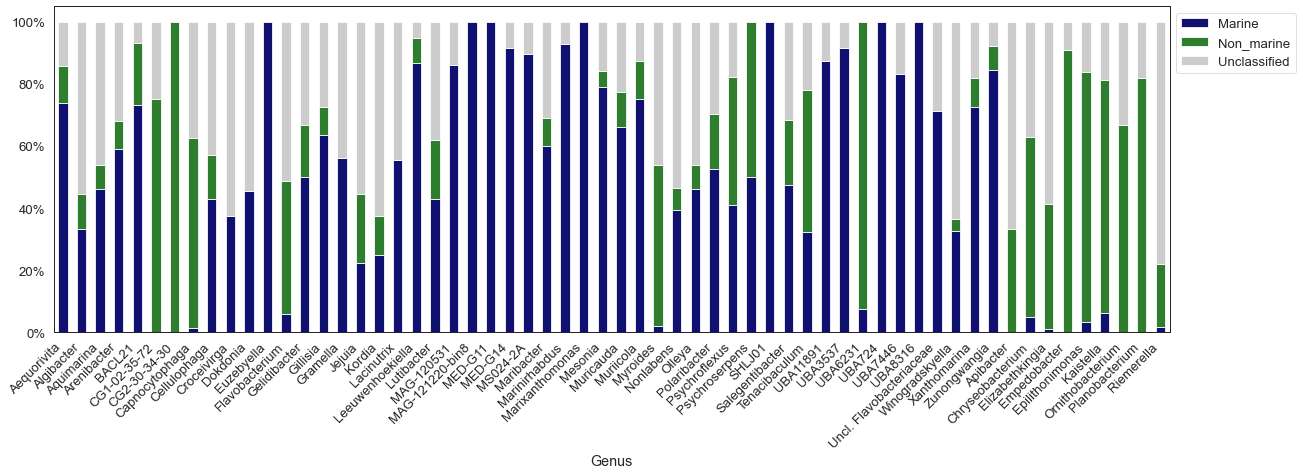

In [106]:
from  matplotlib.ticker import PercentFormatter

sns.set_style({'font.family': 'Arial'})
sns.set(style="white")
sns.set_context("paper", font_scale=1.5) 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

my_colors=["#101070","#2f7e2f","#cbcccb"]

ax = dataset_reduced3.plot(kind='bar', x="Genus",stacked=True, figsize=(20,6), legend=False, color=my_colors)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(PercentFormatter())
#ax.ylabel('',  color="black")

fig = ax.get_figure()
fig.savefig("Distribution_regarding_origin.pdf", dpi=300, bbox_inches='tight')

## Sort by P ratio: 

In [107]:
l = ['Zunongwangia', 'Algibacter', 'Leeuwenhoekiella', 'Euzebyella', 'CG1-02-35-72', 'Arenibacter', 'Capnocytophaga', 'Polaribacter', 'UBA8316', 'BACL21', 'Ornithobacterium', 'Jejuia', 'Cellulophaga', 'UBA3537', 'Lacinutrix', 'Gillisia', 'Flavobacterium', 'Salegentibacter', 'Olleya', 'Gramella', 'Mesonia', 'Lutibacter', 'Nonlabens', 'UBA7446', 'CG2-30-34-30', 'UBA724', 'UBA6231', 'Gelidibacter', 'Epilithonimonas', 'Winogradskyella', 'Elizabethkingia', 'Croceivirga', 'Dokdonia', 'Maribacter', 'Muricauda', 'Empedobacter', 'Marixanthomonas', 'MAG-120531', 'Xanthomarina', 'Chryseobacterium', 'Aequorivita', 'Psychroserpens', 'Psychroflexus', 'Aquimarina', 'Kordia', 'Kaistella', 'Marinirhabdus', 'MED-G14', 'Riemerella', 'Uncl. Flavobacteriaceae', 'MS024-2A', 'MAG-121220-bin8', 'SHLJ01', 'Muriicola', 'Planobacterium', 'Apibacter', 'UBA11891', 'Tenacibaculum', 'MED-G11', 'Myroides']

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(l, range(len(l))))

# Generate a rank column that will be used to sort
# the dataframe numerically
dataset_reduced3['Genus2'] = dataset_reduced3['Genus'].map(sorterIndex)

dataset_reduced3_sorted = dataset_reduced3.sort_values(by="Genus2")

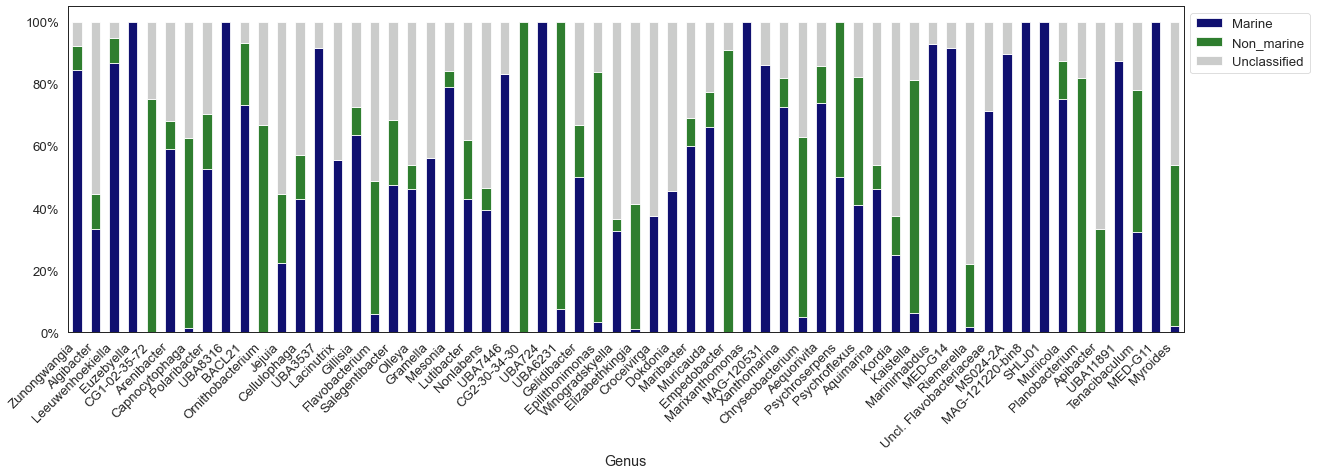

In [108]:
from  matplotlib.ticker import PercentFormatter

sns.set_style({'font.family': 'Arial'})
sns.set(style="white")
sns.set_context("paper", font_scale=1.5) 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

my_colors=["#101070","#2f7e2f","#cbcccb"]

ax = dataset_reduced3_sorted.drop(columns="Genus2").plot(kind='bar', x="Genus",stacked=True, figsize=(20,6), legend=False, color=my_colors)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(PercentFormatter())
#ax.ylabel('',  color="black")

fig = ax.get_figure()
#fig.savefig("Distribution_regarding_origin.pdf", dpi=300, bbox_inches='tight')

In [109]:
dataset_reduced2 = dataset.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family", "MAG"])["MAG"].count().to_frame()
dataset_reduced2 = dataset_reduced2.rename(columns={"MAG":"Value"})#.reset_index()
dataset_reduced2 = dataset_reduced2.unstack('MAG')#.droplevel(level=0)
dataset_reduced2 = dataset_reduced2.fillna(0)

dataset_reduced2.columns = dataset_reduced2.columns.droplevel()
dataset_reduced2 = dataset_reduced2.reset_index()#.drop_index()
dataset_reduced2 = dataset_reduced2.rename(columns={False:"Cultivated genome", True:"MAG"})#.reset_index()

dataset_reduced3 = dataset_reduced2.copy()
dataset_reduced3["Total"] = dataset_reduced3["MAG"] + dataset_reduced3["Cultivated genome"]
dataset_reduced3["MAG %"] = dataset_reduced3["MAG"] / dataset_reduced3["Total"] *100
dataset_reduced3["Cultivated genome %"] = dataset_reduced3["Cultivated genome"] / dataset_reduced3["Total"] *100
dataset_reduced3 = dataset_reduced3.drop(columns=["MAG", "Cultivated genome","Total"])
dataset_reduced3 = dataset_reduced3.sort_values(by=["Family","Genus"])
dataset_reduced3 = dataset_reduced3.rename(columns={"MAG %":"MAG", "Cultivated genome %":"Cultivated \ngenome"})#.reset_index()

dataset_reduced3.head() 

MAG,Genus,Family,MAG,Cultivated \ngenome
0,Aequorivita,Flavobacteriaceae,61.904762,38.095238
1,Algibacter,Flavobacteriaceae,0.000000,100.000000
3,Aquimarina,Flavobacteriaceae,5.128205,94.871795
4,Arenibacter,Flavobacteriaceae,13.636364,86.363636
5,BACL21,Flavobacteriaceae,100.000000,0.000000


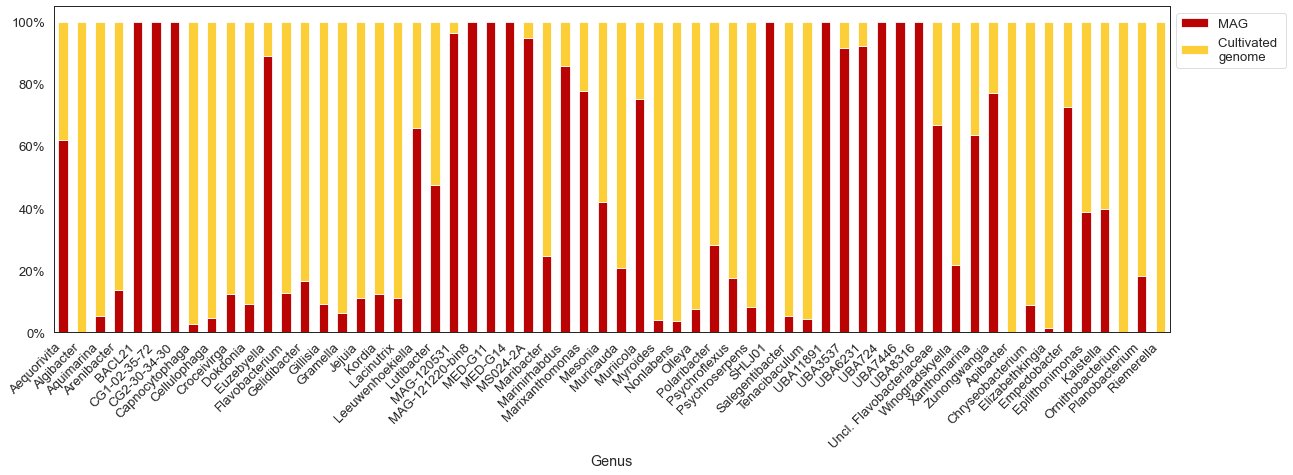

In [110]:
from  matplotlib.ticker import PercentFormatter

sns.set_style({'font.family': 'Arial'})
sns.set(style="white")
sns.set_context("paper", font_scale=1.5) 


my_colors=["#BA0303","#FCCE38"]

ax = dataset_reduced3.plot(kind='bar', x="Genus",stacked=True, figsize=(20,6), legend=False, color=my_colors)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(PercentFormatter())
#ax.ylabel('',  color="black")

fig = ax.get_figure()
fig.savefig("Distribution_regarding_genome_assembly.pdf", dpi=300, bbox_inches='tight')

In [111]:
l = ['Zunongwangia', 'Algibacter', 'Leeuwenhoekiella', 'Euzebyella', 'CG1-02-35-72', 'Arenibacter', 'Capnocytophaga', 'Polaribacter', 'UBA8316', 'BACL21', 'Ornithobacterium', 'Jejuia', 'Cellulophaga', 'UBA3537', 'Lacinutrix', 'Gillisia', 'Flavobacterium', 'Salegentibacter', 'Olleya', 'Gramella', 'Mesonia', 'Lutibacter', 'Nonlabens', 'UBA7446', 'CG2-30-34-30', 'UBA724', 'UBA6231', 'Gelidibacter', 'Epilithonimonas', 'Winogradskyella', 'Elizabethkingia', 'Croceivirga', 'Dokdonia', 'Maribacter', 'Muricauda', 'Empedobacter', 'Marixanthomonas', 'MAG-120531', 'Xanthomarina', 'Chryseobacterium', 'Aequorivita', 'Psychroserpens', 'Psychroflexus', 'Aquimarina', 'Kordia', 'Kaistella', 'Marinirhabdus', 'MED-G14', 'Riemerella', 'Uncl. Flavobacteriaceae', 'MS024-2A', 'MAG-121220-bin8', 'SHLJ01', 'Muriicola', 'Planobacterium', 'Apibacter', 'UBA11891', 'Tenacibaculum', 'MED-G11', 'Myroides']

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(l, range(len(l))))

# Generate a rank column that will be used to sort
# the dataframe numerically
dataset_reduced3['Genus2'] = dataset_reduced3['Genus'].map(sorterIndex)

dataset_reduced3_sorted = dataset_reduced3.sort_values(by="Genus2")

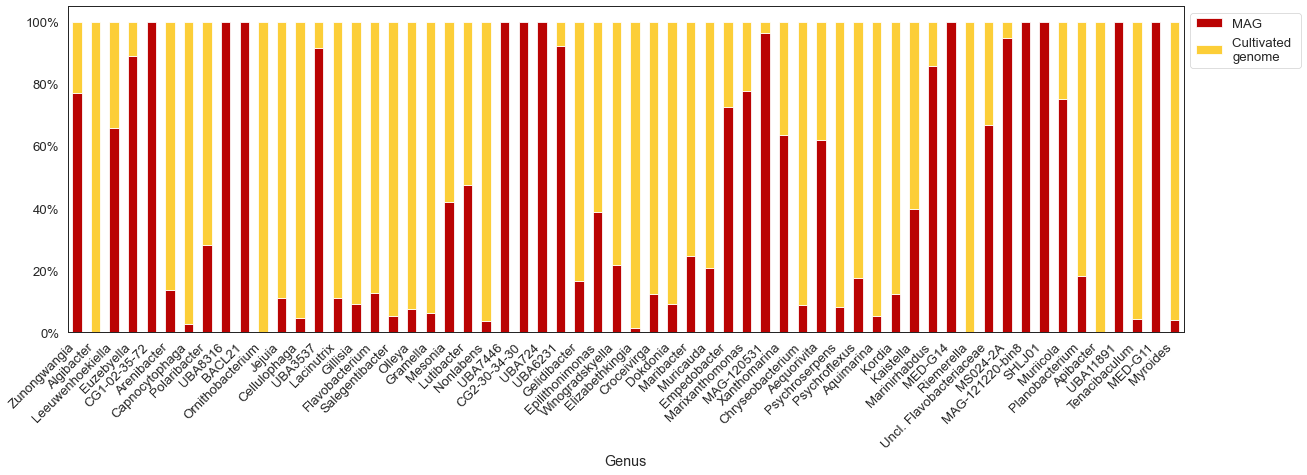

In [112]:
from  matplotlib.ticker import PercentFormatter

sns.set_style({'font.family': 'Arial'})
sns.set(style="white")
sns.set_context("paper", font_scale=1.5) 


my_colors=["#BA0303","#FCCE38"]

ax = dataset_reduced3_sorted.drop(columns="Genus2").plot(kind='bar', x="Genus",stacked=True, figsize=(20,6), legend=False, color=my_colors)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(PercentFormatter())
#ax.ylabel('',  color="black")

fig = ax.get_figure()
#fig.savefig("Distribution_regarding_genome_assembly.pdf", dpi=300, bbox_inches='tight')

In [113]:
dataset_reduced3[dataset_reduced3["Cultivated \ngenome"] <= 30]

MAG,Genus,Family,MAG,Cultivated \ngenome,Genus2
5,BACL21,Flavobacteriaceae,100.000000,0.000000,9
6,CG1-02-35-72,Flavobacteriaceae,100.000000,0.000000,4
7,CG2-30-34-30,Flavobacteriaceae,100.000000,0.000000,24
16,Euzebyella,Flavobacteriaceae,88.888889,11.111111,3
27,MAG-120531,Flavobacteriaceae,96.551724,3.448276,37
28,MAG-121220-bin8,Flavobacteriaceae,100.000000,0.000000,51
29,MED-G11,Flavobacteriaceae,100.000000,0.000000,58
30,MED-G14,Flavobacteriaceae,100.000000,0.000000,47
31,MS024-2A,Flavobacteriaceae,94.736842,5.263158,50
33,Marinirhabdus,Flavobacteriaceae,85.714286,14.285714,46


In [114]:
dataset_reduced3[dataset_reduced3["Cultivated \ngenome"] <= 0]

MAG,Genus,Family,MAG,Cultivated \ngenome,Genus2
5,BACL21,Flavobacteriaceae,100.0,0.0,9
6,CG1-02-35-72,Flavobacteriaceae,100.0,0.0,4
7,CG2-30-34-30,Flavobacteriaceae,100.0,0.0,24
28,MAG-121220-bin8,Flavobacteriaceae,100.0,0.0,51
29,MED-G11,Flavobacteriaceae,100.0,0.0,58
30,MED-G14,Flavobacteriaceae,100.0,0.0,47
47,SHLJ01,Flavobacteriaceae,100.0,0.0,52
50,UBA11891,Flavobacteriaceae,100.0,0.0,56
53,UBA724,Flavobacteriaceae,100.0,0.0,25
54,UBA7446,Flavobacteriaceae,100.0,0.0,23


11 genus 100% MAGs